# 袁金城-1120202147-DataminingWork2
# 数据集二： SNAP:ego-Twitter
代码仓库：

# 1.数据获取和预处理

In [7]:
import pandas as pd
data = pd.DataFrame(columns=['User1', 'User2'])

In [8]:
data_path = './twitter_combined.txt'
data = pd.read_csv(data_path, delim_whitespace=True, header=None, names=['User1', 'User2'])

data.head()

,User1,User2
0,214328887,34428380
1,17116707,28465635
2,380580781,18996905
3,221036078,153460275
4,107830991,17868918


数据分析处理

In [12]:
import matplotlib.pyplot as plt

# 计算每个用户的访问量
users_visits = data['User2'].value_counts()

# 找出最常被访问的用户
most_visited_users = users_visits.head(40)

# 打印最常被访问的用户
print("最常使用的用户：")
print(most_visited_users)

最常使用的用户：
User2
40981798     8660
43003845     7700
22462180     7623
34428380     7558
115485051    4798
15913        4337
3359851      3986
11348282     3850
7861312      3712
27633075     3655
31331740     3623
18996905     3255
7860742      3197
813286       3172
22784458     2974
17868918     2904
10671602     2874
117674417    2858
48485771     2725
34068984     2693
18927441     2680
83943787     2678
15853668     2634
1183041      2593
238260874    2560
8088112      2539
16464746     2425
16098603     2399
88323281     2356
18776017     2346
133055665    2342
263838766    2317
309366491    2291
90420314     2241
116036694    2238
31353077     2209
100318079    2208
14654965     2122
63485337     2095
59804598     2083
Name: count, dtype: int64


找出访问量最高的访客

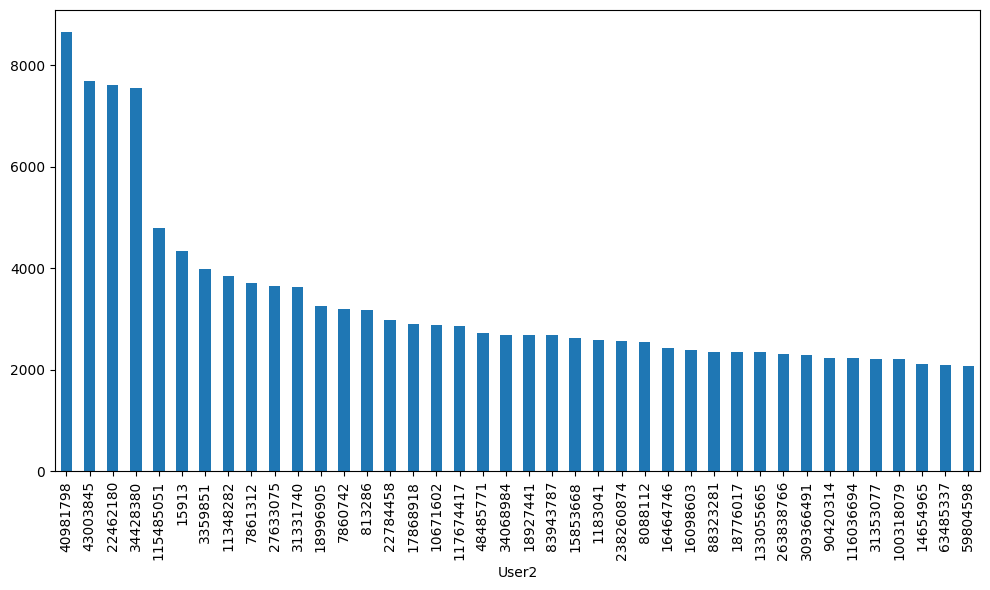

In [13]:

plt.figure(figsize=(10, 6))
most_visited_users.plot(kind='bar')

plt.tight_layout() 
plt.show()

# 2.频繁项集挖掘和关联规则处理

In [18]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# 将用户数据按照 User1 分组并整理成列表
user_data = data.groupby('User1')['User2'].agg(list).tolist()

# 使用 TransactionEncoder 将列表转换为二维数组
te = TransactionEncoder()
data_encoded = te.fit_transform(user_data)
df = pd.DataFrame(data_encoded, columns=te.columns_)

frequent_itemsets = apriori(df, min_support=0.03, use_colnames=True)

# 打印频繁项集
print("Frequent Itemsets:")
frequent_itemsets

Frequent Itemsets:


,support,itemsets
0,0.030429,(15913)
1,0.037762,(813286)
2,0.035251,(22462180)
3,0.035123,(34428380)
4,0.045879,(40981798)
5,0.039017,(43003845)
6,0.048262,(115485051)
7,0.033996,"(22462180, 34428380)"
8,0.034738,"(22462180, 40981798)"
9,0.033425,"(22462180, 43003845)"


计算关联规则

In [19]:
# 根据频繁项集计算关联规则
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)

# 打印关联规则
print("\nAssociation Rules:")
# print(rules)
rules


Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(22462180),(34428380),0.035251,0.035123,0.033996,0.964387,27.457607,0.032758,27.093314,0.998789
1,(34428380),(22462180),0.035123,0.035251,0.033996,0.967912,27.457607,0.032758,30.065970,0.998656
2,(22462180),(40981798),0.035251,0.045879,0.034738,0.985431,21.478780,0.033120,65.489786,0.988280
3,(40981798),(22462180),0.045879,0.035251,0.034738,0.757152,21.478780,0.033120,3.972641,0.999289
4,(22462180),(43003845),0.035251,0.039017,0.033425,0.948199,24.301979,0.032050,18.551470,0.993887
5,(43003845),(22462180),0.039017,0.035251,0.033425,0.856673,24.301979,0.032050,6.731092,0.997782
6,(34428380),(40981798),0.035123,0.045879,0.034766,0.989846,21.575003,0.033155,93.961808,0.988364
7,(40981798),(34428380),0.045879,0.035123,0.034766,0.757774,21.575003,0.033155,3.983370,0.999507
8,(34428380),(43003845),0.035123,0.039017,0.033325,0.948822,24.317946,0.031955,18.777296,0.993782
9,(43003845),(34428380),0.039017,0.035123,0.033325,0.854113,24.317946,0.031955,6.613883,0.997810


# 3.模式命名

本模式可命名为：

1.用户访客的频繁模式。首先是根据用户对于访客量大小的展示，揭示了访客量高的群体。

2.用户社交的频繁模式。这个模式表示了用户群体之间的关联性，体现了用户的社交圈子，不同的用户之间的关联程度不一致。

以上模式可以用来探索用户的社交圈，结合其它方面的信息，可以进行社交圈的统一推送。

# 4.挖掘结果分析

1.对于用户访客的频繁模式：在支持度为0.03时，只有少数几个项是单独一个数据，说明有少数的用户是只有自己的社交圈，没有和其它用户互动。

2.对于用户社交的频繁模式。有不少用户是存在较多的节点对当中，并且形成了单独的一个圈子，这说明他们之间的联系相对紧密，可能是工作或者生活中的好友、家人。

# 5.可视化展示

对于社交圈子，可用以下Spring布局进行展示,其中选取的43003845和40981798是上述频繁项集中支持度为0.037的一项，以下的图中，红色的点表示两者共同的节点，蓝色和绿色的点分别表示两者独立的点。可以看出两者的交友圈存在大量的重叠，这意味着两人很可能是家人关系或者同学同事关系。

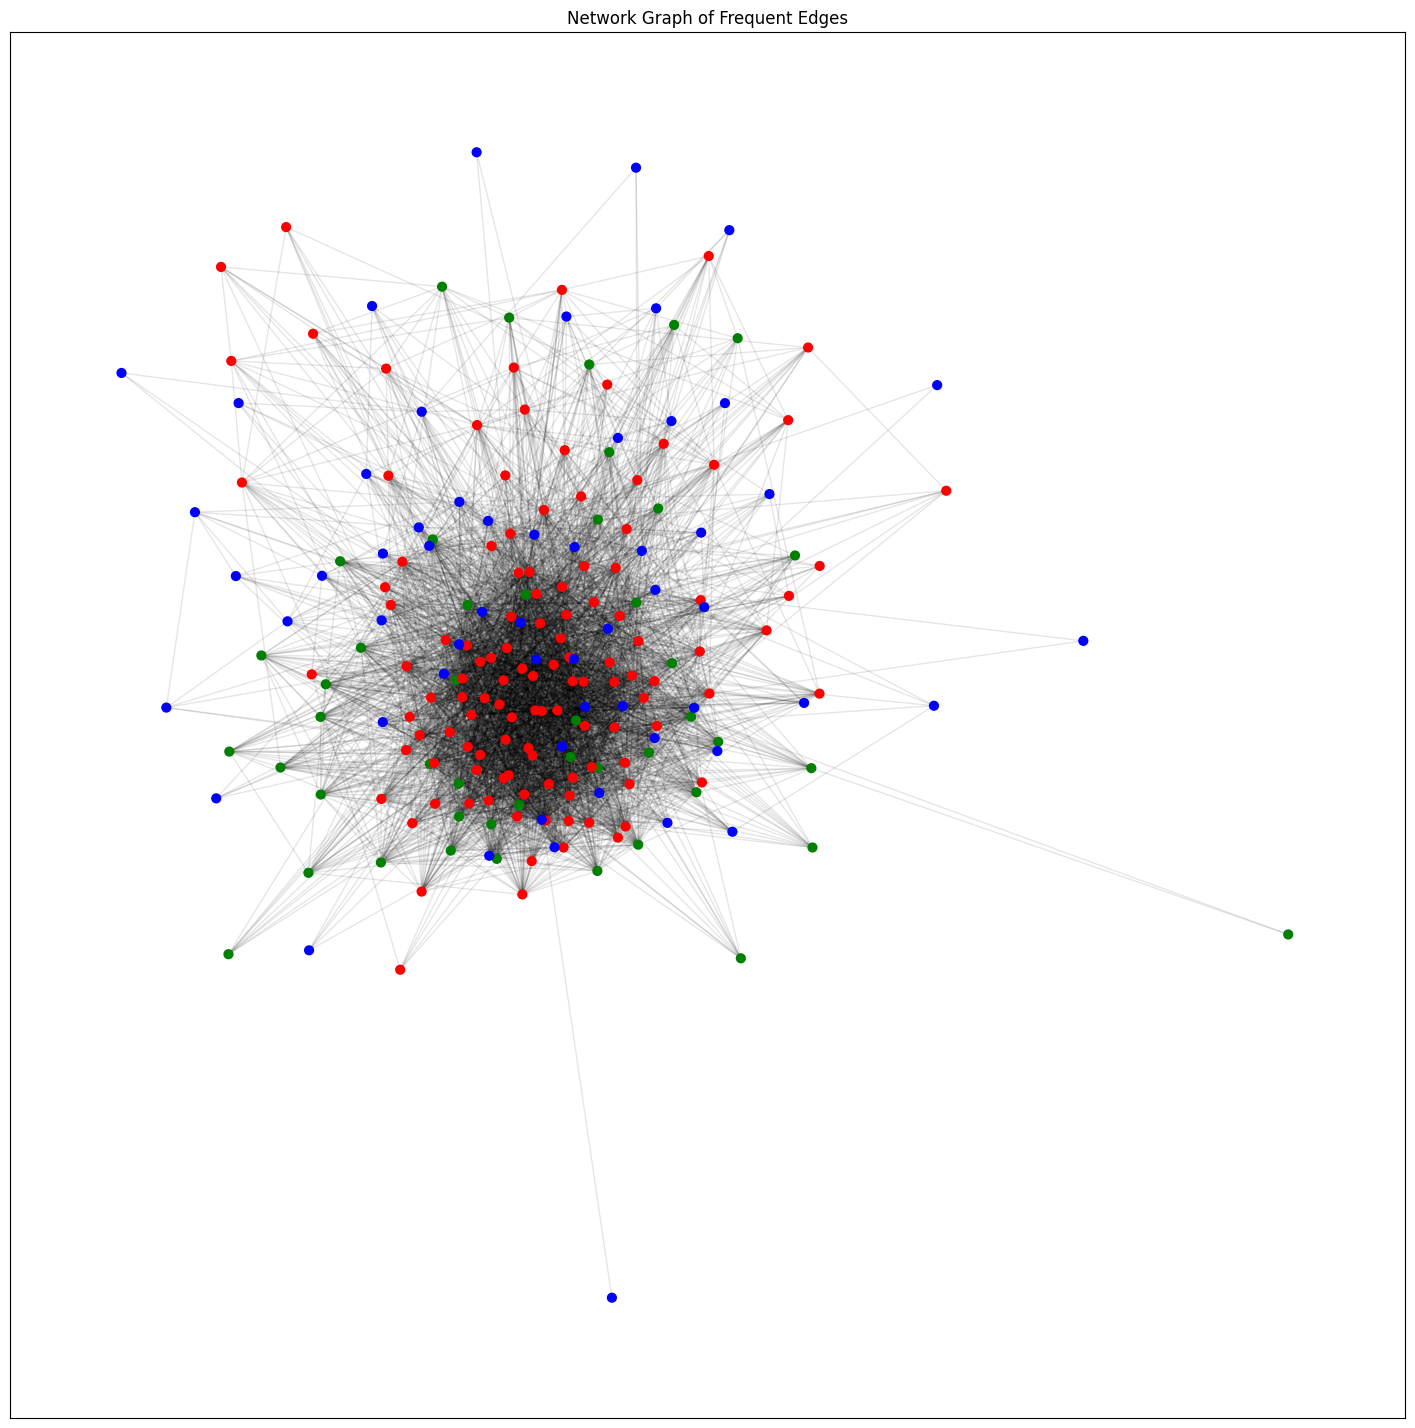

In [50]:
import networkx as nx
import matplotlib.pyplot as plt

# 读取第一个图的数据
edgepath1 = "/mnt/workspace/random/twitter/43003845.edges" 
edgedf1 = pd.read_csv(edgepath1, delim_whitespace=True, header=None, names=['User1', 'User2'])
G1 = nx.from_pandas_edgelist(edgedf1, 'User1', 'User2')

# 读取第二个图的数据
edgepath2 = "/mnt/workspace/random/twitter/40981798.edges"
edgedf2 = pd.read_csv(edgepath2, delim_whitespace=True, header=None, names=['User1', 'User2'])
G2 = nx.from_pandas_edgelist(edgedf2, 'User1', 'User2')

# 找到两个图的公共节点
common_nodes = set(G1.nodes()).intersection(G2.nodes())

# 将两个图中的公共节点涂成黑色
for node in common_nodes:
    G1.nodes[node]['color'] = 'red'
    G2.nodes[node]['color'] = 'red'

# 绘制第一个图
plt.figure(figsize=(18, 18))
pos1 = nx.spring_layout(G1)
nx.draw_networkx_nodes(G1, pos1, node_size=40, node_color=[G1.nodes[node].get('color', 'green') for node in G1.nodes()], alpha=1)
nx.draw_networkx_edges(G1, pos1, alpha=0.1)

# 绘制第二个图
pos2 = nx.spring_layout(G2)
nx.draw_networkx_nodes(G2, pos2, node_size=40, node_color=[G2.nodes[node].get('color', 'blue') for node in G2.nodes()], alpha=1)
nx.draw_networkx_edges(G2, pos2, alpha=0.1)

plt.title('Network Graph of Frequent Edges')
plt.show()
